In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class Agentstate(TypedDict):
  message:str

In [3]:
def play(state:Agentstate)->Agentstate:
  print("I am playing")
  state["message"]=state['message']+"I aṁplanning to play"
  return state

In [4]:
def cricket(state:Agentstate)->Agentstate:
  print("Cricket node has been called")
  state['message']=state['message']+ "Cricket"
  return state

In [5]:
def badmitton(state:Agentstate)->Agentstate:
  print("badmitton node has been called")
  state['message']=state['message']+ "badmitton"
  return state

In [6]:
import random
from typing import Literal

def random_play(state:Agentstate)->Literal['cricket','badmitton']:
  if random.random()>0.5:
    return 'cricket'
  else:
    return 'badmitton'

In [7]:
graph=StateGraph(Agentstate)

In [8]:
graph.add_node("play_node",play)
graph.add_node("cricket",cricket)
graph.add_node("badmitton",badmitton)

graph.add_edge(START,"play_node")
graph.add_conditional_edges("play_node",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badmitton",END)

app=graph.compile()

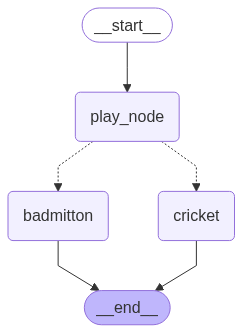

In [16]:
from IPython.display import Image,display
import graph_builder

display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
app.invoke({"message":"Hello "})

I am playing
Cricket node has been called


{'message': 'Hello I aṁplanning to playCricket'}